## NON LINEAR REGRESSION MODELS

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

## KNN 

In [73]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [74]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [75]:
knn_model

KNeighborsRegressor()

In [76]:
knn_model.n_neighbors

5

In [77]:
knn_model.effective_metric_

'euclidean'

## Predıct

In [78]:
y_pred = knn_model.predict(X_test)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [80]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [83]:
knn = KNeighborsRegressor()

In [84]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [85]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [86]:
knn_cv_model.best_params_["n_neighbors"]

8

In [87]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [88]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [89]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [90]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

## Support Vector Regression

In [91]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [92]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [93]:
from sklearn.svm import SVR

In [94]:
svr_model = SVR("linear").fit(X_train, y_train)

In [95]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [96]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [97]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [98]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [99]:
y_pred = svr_model.predict(X_train)

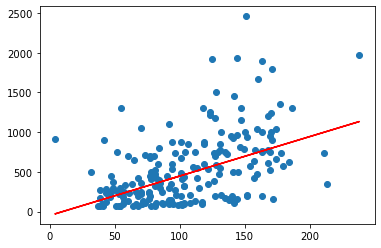

In [100]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [101]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [102]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

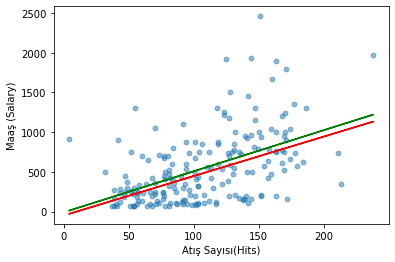

In [103]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Predict

In [104]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [105]:
svr_model.predict([[91]])

array([403.52804878])

In [106]:
y_pred = svr_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [108]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [109]:
svr_model

SVR(kernel='linear')

In [110]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [111]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [112]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [113]:
y_pred = svr_tuned.predict(X_test)

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

### Non Linear SVR ##

In [3]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [4]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

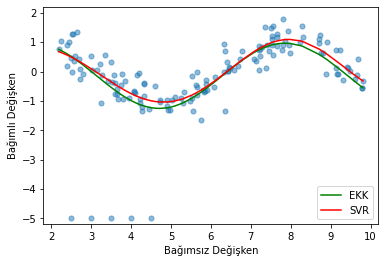

In [5]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Predict

In [12]:
y_pred = svr_rbf.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [15]:
svr_rbf

SVR()

In [31]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [32]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [33]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [34]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Neural Network

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)

In [7]:
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neural_network import MLPRegressor

In [11]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [15]:
mlp_model.n_layers_

4

In [16]:
mlp_model.hidden_layer_sizes

(100, 20)

## Predict

In [21]:
y_pred = mlp_model.predict(X_test_scaled)
y_pred

array([ 69.60329787, 148.01194231, 249.39897768,  66.84642749,
        78.83069661,  40.79276208,  54.3983715 ,  69.77664214,
       268.40429955, 132.0339421 , 102.18272398, 283.66659544,
        76.98130908, 130.07157807,  27.05365626, 173.58635276,
       185.66134771,  60.62810889, 214.6049501 ,  45.76031605,
        28.85238619, 147.39797879,  58.68611432,  52.15687922,
       156.69423116,  62.02276369, 238.82245777,  31.27386395,
        84.6078235 ,  63.58008557,  59.49212761,  82.71103369,
        25.51362621,  74.42137776,  38.94314813, 143.58492675,
       448.81318166,  33.51338959,  69.15875482,  43.07030741,
        62.38299447,  32.83181641,  31.68863586,  25.17748859,
       289.07206703, 137.4395306 ,  38.1825753 ,  39.63182961,
        53.43187813, 121.57279786, 132.35172368,  29.48995259,
       113.30802355,  53.63740728,  46.72086106, 101.68904191,
        31.43134995, 164.85475204,  58.68965104, 434.71469085,
       460.96855924,  48.2960917 , 148.07583942,  21.48

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

573.5407922049658

## Model Tuning

In [23]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [24]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [32]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [33]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [34]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [35]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [36]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [37]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred)) ## the lowest test error value

352.98714673256484

# CART // decision tree regressor

In [40]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [41]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [45]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model

DecisionTreeRegressor()

In [46]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\enes\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisson deviance cr

In [47]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

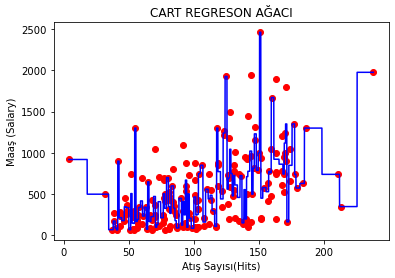

In [48]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [51]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54265 sha256=4a42119e1784e8725bada5ec1a10285ee744dfc45e1b13d4aaf9a937d5e36500
  Stored in directory: c:\users\enes\appdata\local\pip\cache\wheels\2c\b1\69\4b5b50d4d429c350df3e1d2e8b35fdf5584448738d6cd3f540
Successfully built skompiler


In [52]:
from skompiler import skompile

In [54]:
print(skompile(cart_model.predict).to('python/code')) ## I got some error in here but nothing important about model. Its about my phytonpath

ModuleNotFoundError: No module named 'astor'

## Predict

In [80]:
x = [91]

In [81]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [82]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [83]:
cart_model.predict([[91]])

array([125.])

In [84]:
y_pred =cart_model.predict(X_test)

In [85]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [86]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [88]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [89]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [90]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [91]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [92]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [93]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [94]:
y_pred = cart_tuned.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

# Bagged Trees Regresyon

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [5]:
bag_model.n_estimators

10

In [6]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=923627717),
 DecisionTreeRegressor(random_state=486112965),
 DecisionTreeRegressor(random_state=959130801),
 DecisionTreeRegressor(random_state=841566686),
 DecisionTreeRegressor(random_state=1500849911),
 DecisionTreeRegressor(random_state=1241219415),
 DecisionTreeRegressor(random_state=1963324904),
 DecisionTreeRegressor(random_state=1236721009),
 DecisionTreeRegressor(random_state=1516920260),
 DecisionTreeRegressor(random_state=126023836)]

In [7]:
bag_model.estimators_samples_

[array([132,  15,  58, 168,  22,   0, 186, 147,  94,  26, 196, 101, 184,
         93,  44, 102, 126, 179, 173, 183,  64, 125, 194, 144,  72, 157,
         78,  99, 194, 187, 129, 178,  70,  84, 182,  44,  37,  56,  41,
        110, 101, 183,  65, 102, 184, 154, 136,  27,  34, 156,   4,  18,
        175,   0,   1, 111, 112,  26, 185,  68, 137,  87, 175, 155, 102,
         19, 185, 155,  65, 114, 170, 134, 184,  27, 191,  65, 171, 116,
         20,  83, 170, 161, 183, 141, 111,  43,  31, 101,  17,  84,  24,
        179,  62, 121, 115, 145, 145,  51, 120, 178, 191, 110,  72, 103,
          7,  84, 186,  40, 135,  30, 150, 162,  46, 178, 113, 167, 111,
          9, 183,  50,  25,  43,  39, 176, 111, 140, 151, 139, 153, 162,
         41,  88, 184, 187,  65,  43,  24,  28,  44, 132,  95, 142,  44,
        139, 127,  34, 134, 166,   8, 192, 116, 121, 164, 137,  15,  21,
          3, 113, 183, 125, 176,  10, 128, 137, 171, 163, 133,  93, 177,
        177, 122,  58, 178, 145,  60, 191,  10,  31

In [8]:
bag_model.estimators_features_

[array([ 5, 11, 17, 18, 15, 17,  8, 14, 15, 12, 15,  7, 12, 10,  3, 15, 17,
        18,  0]),
 array([ 5,  3,  6, 18, 12,  9, 17, 15,  9,  1,  7,  4, 18,  3, 18,  9,  4,
         5,  3]),
 array([17, 13,  6,  0,  3, 12, 10, 18,  4, 14, 10, 14,  6,  5,  6, 10,  9,
        13,  5]),
 array([ 7,  1,  8, 18, 14, 15, 10, 14, 15,  6, 18, 13, 16,  1, 16,  5, 16,
         8,  1]),
 array([17, 10, 13, 18, 15, 18, 11, 17,  3, 12, 12,  5, 10,  5,  7,  2, 12,
         7,  0]),
 array([ 5,  2,  3, 16, 15, 12,  9,  2,  6,  5, 15, 13,  3, 16,  3,  4, 10,
         6, 13]),
 array([ 8, 13,  8, 11, 10, 11, 18, 13, 12,  1, 12,  5,  7,  0,  8,  6, 18,
         6, 11]),
 array([17,  8,  6, 11,  3,  6, 10, 10, 16,  0,  2, 11,  6, 11, 16,  3,  6,
         8, 14]),
 array([ 4, 11,  4,  3,  4,  7,  5,  3, 18,  8,  5, 18,  2,  5,  5, 16, 14,
         2,  5]),
 array([16,  8, 14, 12, 17, 10, 18,  1, 18,  1,  5, 10,  2,  1, 16, 17,  1,
        12,  7])]

In [11]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=486112965)

## Predict

In [12]:
y_pred = bag_model.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

382.9106805480428

In [14]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

537.5887928294575

In [27]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

439.7310681972149

## Model Tuning

In [29]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [30]:
bag_params = {"n_estimators": range(2,20)}

In [31]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [32]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [33]:
bag_cv_model.best_params_

{'n_estimators': 17}

In [34]:
bag_tuned = BaggingRegressor( n_estimators = 17, random_state = 45)

In [35]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=17, random_state=45)

In [36]:
y_pred = bag_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.0060534136818

# Random Forests

In [38]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_model = RandomForestRegressor(random_state = 42)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# ** Predict

In [44]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [45]:
y_pred = rf_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [47]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [48]:
rf_model = RandomForestRegressor(random_state = 42)

In [49]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [50]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [52]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [53]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [54]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [55]:
y_pred = rf_tuned.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

341.531248725719

In [57]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

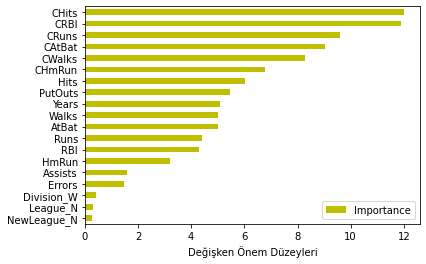

In [65]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "y")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [68]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.4835256995504

## Model Tuning

In [69]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [70]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [71]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.5}

In [72]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 5, 
                                      n_estimators = 2000, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [73]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

329.0017951713364

In [74]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

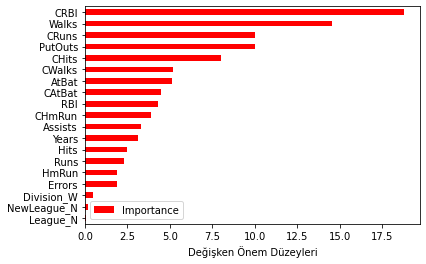

In [75]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [76]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [78]:
!pip install xgboost

In [79]:
import xgboost as xgb

In [80]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [81]:
from xgboost import XGBRegressor

In [82]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [83]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [84]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [86]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [87]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [88]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [89]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275204366939

# Light GBM

In [90]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [91]:
!pip install lightgbm

In [92]:
from lightgbm import LGBMRegressor

In [93]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Predict

In [94]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [96]:
lgbm_model

LGBMRegressor()

In [97]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [98]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [99]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [100]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [101]:
y_pred = lgbm_tuned.predict(X_test)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CatBoost

In [103]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [104]:
!pip install catboost

In [105]:
from catboost import CatBoostRegressor

In [106]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 134ms	remaining: 2m 13s
1:	learn: 432.4168868	total: 136ms	remaining: 1m 7s
2:	learn: 426.3836690	total: 138ms	remaining: 45.8s
3:	learn: 420.2261014	total: 140ms	remaining: 34.9s
4:	learn: 414.9976675	total: 142ms	remaining: 28.3s
5:	learn: 409.6125323	total: 146ms	remaining: 24.2s
6:	learn: 403.9277911	total: 149ms	remaining: 21.1s
7:	learn: 398.4395285	total: 151ms	remaining: 18.7s
8:	learn: 392.4517081	total: 153ms	remaining: 16.8s
9:	learn: 387.4871123	total: 155ms	remaining: 15.4s
10:	learn: 382.6230510	total: 158ms	remaining: 14.2s
11:	learn: 378.1012454	total: 162ms	remaining: 13.3s
12:	learn: 372.6002306	total: 167ms	remaining: 12.7s
13:	learn: 368.4682192	total: 172ms	remaining: 12.1s
14:	learn: 364.0565766	total: 174ms	remaining: 11.4s
15:	learn: 359.5683249	total: 180ms	remaining: 11.1s
16:	learn: 355.1782794	total: 182ms	remaining: 10.6s
17:	learn: 350.4689946	total: 185ms	remaining: 10.1s
18:	learn: 346.2553348	to

## Predict

In [107]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning

In [108]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [110]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, 
                             catb_grid, cv=5,
                             n_jobs = -1,
                             verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))